# Homework # 7

## Validation

In the following problems, use the data provided in the files in.dta and out.dta for
Homework # 6. We are going to apply linear regression with a nonlinear transformation
for classification (without regularization). The nonlinear transformation is given
by $\phi_0$ through $\phi_7$ which transform $(x_1 ,x_2)$ into
$$1 \hspace{1em} x_1 \hspace{1em} x_2 \hspace{1em} x_1^2 \hspace{1em} x_2^2 \hspace{1em}
x_1 x_2 \hspace{1em} \left|x_1 - x_2\right| \hspace{1em} \left|x_1 + x_2\right|$$
To illustrate how taking out points for validation affects the performance, we will
consider the hypotheses trained on $\mathcal{D}_\mathrm{train}$
(without restoring the full $\mathcal{D}$ for training after validation is done).

### 1.
Split **in.dta** into training (first 25 examples) and validation (last 10 examples).
Train on the 25 examples only, using the validation set of 10 examples to select
between five models that apply linear regression to $\phi_0$ through $\phi_k$, with
$k = 3,4,5,6,7$. For which model is the classification error on the validation set
smallest?

[a] k = 3

[b] k = 4

[c] k = 5

[d] k = 6

[e] k = 7

In [ ]:
# download("http://work.caltech.edu/data/in.dta", "in.dta")
# download("http://work.caltech.edu/data/out.dta", "out.dta")

In [17]:
training_data = readdlm("in.dta")
test_data = readdlm("out.dta");

In [2]:
transformer=(i,x)->[1, x[1], x[2], x[1]^2, x[2]^2, x[1]*x[2], abs(x[1]-x[2]), abs(x[1]+x[2])][1:i+1]

(anonymous function)

In [3]:
function mis_classified_count(points, labels, weights)
    return sum(sign(points*weights) .!= labels)
end

function linear_regression(points, labels)
    return pinv(points'*points)*points'*labels # this is faster than simple pinv(points)*labels
end

linear_regression (generic function with 1 method)

In [4]:
function question1()
    for i in 3:7
        training_points_whole = mapslices(x->transformer(i, x), training_data, 2)
        training_labels_whole = training_data[:,3];
        training_points = training_points_whole[1:25,:]
        validation_points = training_points_whole[26:35,:]
        training_labels = training_labels_whole[1:25]
        validation_labels = training_labels_whole[26:35];
        
        training_weights = linear_regression(training_points, training_labels)
        validation_error = mis_classified_count(validation_points,validation_labels,
            training_weights)/length(validation_labels)
        @show((i, validation_error))
    end
end

question1 (generic function with 1 method)

In [5]:
question1()

(i,validation_error) = (3,0.3)
(i,validation_error) = (4,0.5)
(i,validation_error) = (5,0.2)
(i,validation_error) = (6,0.0)
(i,validation_error) = (7,0.1)


## 2.
Evaluate the out-of-sample classification error using **out.dta** on the 5 models
to see how well the validation set predicted the best of the 5 models. For which
model is the out-of-sample classification error smallest?

[a] k = 3

[b] k = 4

[c] k = 5

[d] k = 6

[e] k = 7

In [6]:
function question2()
    for i in 3:7
        training_points_whole = mapslices(x->transformer(i, x), training_data, 2)
        training_labels_whole = training_data[:,3];
        training_points = training_points_whole[1:25,:]
        training_labels = training_labels_whole[1:25]

        test_points = mapslices(x->transformer(i, x), test_data, 2)
        test_labels = test_data[:,3];
        
        training_weights = linear_regression(training_points, training_labels)
        test_error = mis_classified_count(test_points,test_labels,
            training_weights)/length(test_labels)
        
        @show((i, test_error))
    end
end

question2 (generic function with 1 method)

In [7]:
question2()

(i,test_error) = (3,0.42)
(i,test_error) = (4,0.416)
(i,test_error) = (5,0.188)
(i,test_error) = (6,0.084)
(i,test_error) = (7,0.072)


### 3.
Reverse the role of training and validation sets; now training with the last 10
examples and validating with the first 25 examples. For which model is the
classification error on the validation set smallest?

[a] k = 3

[b] k = 4

[c] k = 5

[d] k = 6

[e] k = 7

In [8]:
function question3()
    for i in 3:7
        training_points_whole = mapslices(x->transformer(i, x), training_data, 2)
        training_labels_whole = training_data[:,3];
        training_points = training_points_whole[26:35,:]
        validation_points = training_points_whole[1:25,:]
        training_labels = training_labels_whole[26:35]
        validation_labels = training_labels_whole[1:25];
        
        training_weights = linear_regression(training_points, training_labels)
        validation_error = mis_classified_count(validation_points,validation_labels,
            training_weights)/length(validation_labels)
        @show((i, validation_error))
    end
end

question3 (generic function with 1 method)

In [9]:
question3()

(i,validation_error) = (3,0.28)
(i,validation_error) = (4,0.36)
(i,validation_error) = (5,0.2)
(i,validation_error) = (6,0.08)
(i,validation_error) = (7,0.12)


### 4.
Once again, evaluate the out-of-sample classification error using out.dta on the
5 models to see how well the validation set predicted the best of the 5 models.
For which model is the out-of-sample classification error smallest?

[a] k = 3

[b] k = 4

[c] k = 5

[d] k = 6

[e] k = 7

In [10]:
function question4()
    for i in 3:7
        training_points_whole = mapslices(x->transformer(i, x), training_data, 2)
        training_labels_whole = training_data[:,3];
        training_points = training_points_whole[26:35,:]
        training_labels = training_labels_whole[26:35]

        test_points = mapslices(x->transformer(i, x), test_data, 2)
        test_labels = test_data[:,3];
        
        training_weights = linear_regression(training_points, training_labels)
        test_error = mis_classified_count(test_points,test_labels,
            training_weights)/length(test_labels)
        
        @show((i, test_error))
    end
end

question4 (generic function with 1 method)

In [11]:
question4()

(i,test_error) = (3,0.396)
(i,test_error) = (4,0.388)
(i,test_error) = (5,0.284)
(i,test_error) = (6,0.192)
(i,test_error) = (7,0.196)


### 5.
What values are closest in Euclidean distance to the out-of-sample classification
error obtained for the model chosen in Problems 1 and 3, respectively?

[a] 0.0, 0.1

[b] 0.1, 0.2

[c] 0.1, 0.3

[d] 0.2, 0.2

[e] 0.2, 0.3

In [12]:
function question5()
    x = [0.084 0.192]
    points =
        [0.0 0.1;
        0.1 0.2;
        0.1 0.3;
        0.2 0.2;
        0.2 0.3]
    
    for i in 1:5
        @show(norm(x-points[i,:]))
    end
end

question5 (generic function with 1 method)

In [13]:
question5()

norm(x - points[i,:]) = 0.12457929201917949
norm(x - points[i,:]) = 0.01788854381999832
norm(x - points[i,:]) = 0.10917875251164944
norm(x - points[i,:]) = 0.11627553482998906
norm(x - points[i,:]) = 0.15849290204927158


## Validation Bias

### 6.
Let $\mathbf{e}_1$ and $\mathbf{e}_2$ be independent random variables, distributed uniformly over the
interval $[0,1]$. Let $\mathbf{e} = \min(\mathbf{e}_1 ,\mathbf{e}_2)$. The expected values of
$\mathbf{e}_1 ,\mathbf{e}_2,\mathbf{e}$ are closest to

[a] 0.5, 0.5, 0

[b] 0.5, 0.5, 0.1

[c] 0.5, 0.5, 0.25

[d] 0.5, 0.5, 0.4

[e] 0.5, 0.5, 0.5

** Analytical **

$
P\{x \leq \mathbf{e}\} = P\{ x \leq \mathbf{e}_1 \mbox{ or } x \leq \mathbf{e}_1 \} = 1-P\{ x \geq \mathbf{e}_1 \mbox{ and } x \geq \mathbf{e}_1 \} =1-(1-x)^2$ for $0 \leq x \leq 1$

So, the probability density function of $\mathbf{e}$ is $p(x) = 2(1-x)$ and the expected value is
$$\int_0^1 p(x)x dx = \int_0^1 2(1-x)x dx = \frac{1}{3}$$

** Simulation **

In [14]:
function question6(num_points=10000)
    e1 = rand(num_points)
    e2 = rand(num_points)
    e3 = min(e1, e2)
    return mean(e1), mean(e2), mean(e3)
end

question6 (generic function with 2 methods)

In [15]:
question6()

(0.4999845037202484,0.4970625974421255,0.33235273909926766)

## Cross Validation

### 7.
You are given the data points $(x,y): (−1,0),(\rho,1),(1,0), \rho \geq 0$, and a choice
between two models: constant $\{h_0(x) = b\}$ and linear $\{h_1(x) = ax + b\}$.
For which value of $\rho$ would the two models be tied using leave-one-out cross-validation with the squared error measure?

[a] $\sqrt{\sqrt{3}+4}$

[b] $\sqrt{\sqrt{3}-1}$

[c] $\sqrt{9+4\sqrt{6}}$

[d] $\sqrt{9-\sqrt{6}}$

[e] None of the above

**Constaint model**

In this model, the optimum parameter is the average of $y$-coordinate of the points.
The squared errors of each case are

* training:$(-1,0),(\rho,1)$, validation:$(1,0)\to \mathbf{e}_1 = \left(\frac{0+1}{2}-1\right)^2=\frac{1}{4}$
* training:$(-1,0),(1,0)$, validation:$(\rho,1)\to \mathbf{e}_2 = \left(\frac{0+0}{2}-1\right)^2=1$
* training:$(\rho,1),(1,0)$, validation:$(-1,0)\to \mathbf{e}_1 = \left(\frac{0+1}{2}-1\right)^2=\frac{1}{4}$

So, the leave-one-out cross-validation error is $E_\mathrm{cv}=\frac{1}{3}(\mathbf{e}_1 + \mathbf{e}_2 + \mathbf{e}_3)=\frac{1}{3}\times \frac{3}{2}$


**Linear model**

In this model, the optimum parameter is determined by the line passing the two training points.
The squared errors of each case are

* training:$(-1,0),(\rho,1)$, validation:$(1,0)$
    * the line passing the two training points is $y = \frac{x+1}{\rho+1}$ and $\mathbf{e}_1 = \left(\frac{1+1}{\rho+1}\right)^2= \left(\frac{2}{\rho+1}\right)^2$

* training:$(-1,0),(1,0)$, validation:$(\rho,1)$
    * the line passing the two training points is $y=0$ and $\mathbf{e}_2 = (0-1)^2=1$

* training:$(\rho,1),(1,0)$, validation:$(-1,0)$
    * the line passing the two training points is $y = \frac{x-1}{\rho-1}$ and $\mathbf{e}_3 = \left(\frac{-1-1}{\rho-1}\right)^2= \left(\frac{-2}{\rho-1}\right)^2$
    
So,  the leave-one-out cross-validation error is $E_\mathrm{cv}=\frac{1}{3}(\mathbf{e}_1 + \mathbf{e}_2 + \mathbf{e}_3)=
\frac{1}{3}\left( \left(\frac{2}{\rho+1}\right)^2+ 1 + \left(\frac{-2}{\rho-1}\right)^2 \right)$

What we want is the $\rho$ equating these two errors and the $\rho$ is the solution of
$$\left(\frac{2}{\rho+1}\right)^2+ 1 + \left(\frac{-2}{\rho-1}\right)^2 = \frac{3}{2}$$
and $\rho = \pm \sqrt{9 + 4\sqrt{6}}, \pm \left(i\sqrt{9 + 4\sqrt{6}}\right)$. From the condition $\rho \geq 0$, we get the answer.

## PLA vs. SVM

*Notice: Quadratic Programming packages sometimes need tweaking and have numerical issues,
and this is characteristic of packages you will use in practical ML situations.
Your understanding of support vectors will help you get to the correct answers.*

In the following problems, we compare PLA to SVM with hard margin on linearly
separable data sets. For each run, you will create your own target function $f$ and
data set $\mathcal{D}$. Take $d = 2$ and choose a random line in the plane as your target function
$f$ (do this by taking two random, uniformly distributed points on $[−1,1] \times [−1,1]$
and taking the line passing through them), where one side of the line maps to $+1$
and the other maps to $−1$. Choose the inputs $\mathbf{x}_n$ of the data set as random points
in $X = [−1,1] \times [−1,1]$, and evaluate the target function on each $\mathbf{x}_n$ to get the
corresponding output $y_n$ . If all data points are on one side of the line, discard the
run and start a new run.

Start PLA with the all-zero vector and pick the misclassified point for each PLA
iteration at random. Run PLA to find the final hypothesis $g_\mathrm{PLA}$ and measure the
disagreement between $f$ and $g_\mathrm{PLA}$ as
$\mathbb{P}[f(\mathbf{x}) \neq g_\mathrm{PLA}(\mathbf{x})]$ (you can either calculate this
exactly, or approximate it by generating a sufficiently large, separate set of points to
evaluate it). Now, run SVM on the same data to find the final hypothesis $g_\mathrm{SVM}$ by
solving
$$\begin{eqnarray}
&\min_{\mathbf{w}, b}&\frac{1}{2}\mathbf{w}^\intercal \mathbf{w} \\
&\mbox{s.t}& y_n (\mathbf{w}^\intercal \mathbf{x}_n + b) \geq 1
\end{eqnarray}$$
using quadratic programming on the primal or the dual problem. Measure the disagreement
between $f$ and $g_\mathrm{SVM}$ as $\mathbb{P}[f(\mathbf{x}) \neq g_\mathrm{SVM}(\mathbf{x})]$,
and count the number of support vectors you get in each run.

### 8.
For $N = 10$, repeat the above experiment for $1000$ runs. How often is $g_\mathrm{SVM}$
better than $g_\mathrm{PLA}$ in approximating $f$? The percentage of time is closest to:

[a] 20%

[b] 40%

[c] 60%

[d] 80%

[e] 100%

In [1]:
function gen_target()
    linpts = 2.0*rand((2,2)) - 1.0
    targ_weights = [1.0; linpts \ [-1, -1]] # a bit slow
    return targ_weights
end

function gen_dataset(num_points, targ_weights)
    points = [ones(num_points) (2.0*rand((num_points,2)) - 1.0)]
    labels = sign(points*targ_weights)
    return points, labels
end

function mis_collection(points, labels, weights)
    return find(sign(points*weights) .!= labels)
end

function perceptron(points, labels)
    weights = zeros(3)
    num_iter = 0
    mis_idxs = mis_collection(points, labels, weights)
    while true
        idx = mis_idxs[rand(1:length(mis_idxs))]
        weights += labels[idx] * points[idx,:][:]
        num_iter += 1
        mis_idxs = mis_collection(points, labels, weights)
        if length(mis_idxs) == 0
            break
        end
    end
    
    return weights, num_iter
end

function prob_difference(targ_weights, hypo_weights; num_mcpoints=10000)
    points = [ones(num_mcpoints) (2.0*rand((num_mcpoints,2)) - 1.0)]
    return sum(sign(points*targ_weights) .!= sign(points*hypo_weights)) / num_mcpoints
end

prob_difference (generic function with 1 method)

In [2]:
using PyCall,PyPlot
@pyimport seaborn as sns

# Same as plot_pla in week2
function plot_svm(points, labels, targ_weights, hypo_weights)
    x11,x12,x21,x22=[], [], [], []
    for idx in 1:size(points)[1]
        if labels[idx] == 1
            push!(x11, points[idx,2])
            push!(x12, points[idx,3])
        else
            push!(x21, points[idx,2])
            push!(x22, points[idx,3])
        end
    end

    fig = figure(figsize=(5,5))
    ax = axes()
    xlim(-1, 1)
    ylim(-1, 1)
    scatter(x11, x12, alpha=0.5, color="red")
    scatter(x21, x22, alpha=0.5, color="blue")
    s = linspace(-1,1)
    targ_func(x) = -targ_weights[2]/targ_weights[3]*x - targ_weights[1]/targ_weights[3]
    hypo_func(x) = -hypo_weights[2]/hypo_weights[3]*x - hypo_weights[1]/hypo_weights[3]
    plot(s, targ_func(s), "g-", label="Target")
    plot(s, hypo_func(s), "y-", label="SVM")
    title("SVM")
    xlabel(L"$x_1$")
    ylabel(L"$x_2$")
    grid("on")
    legend(loc="best")
end

plot_svm (generic function with 1 method)

In [3]:
using JuMP
using Ipopt

# QP implementation of SVM
function svm(points, labels)
    num_features = length(points[1,:][:])
    num_points = length(labels)

    m = Model(solver=IpoptSolver(print_level=0))
    @variable(m, w[1:num_features])
    @variable(m, b)
    @NLobjective(m, Min, 1/2 * sum{w[i]*w[i], i=1:num_features})
    @constraint(m, [n=1:num_points], labels[n]*(sum{w[i] * points[n,:][i], i=1:num_features} + b) >= 1)
    solve(m)
    #@show(getvalue(w))
    return [getvalue(b);getvalue(w)]
end

svm (generic function with 1 method)

In [4]:
using JuMP
using Ipopt

# QP implementation of SVM
# Assuming the points have constant term
function svm2(points, labels)  
    num_features = length(points[1,:][:])
    num_points = length(labels)

    m = Model(solver=IpoptSolver(print_level=0))
    @variable(m, w[1:num_features])
    @NLobjective(m, Min, 1/2 * sum{w[i]*w[i], i=1:num_features})
    @constraint(m, [n=1:num_points], labels[n]*(sum{w[i] * points[n,:][i], i=1:num_features}) >= 1)
    solve(m)
    return getvalue(w)
end

svm2 (generic function with 1 method)

In [5]:
function simulate_svm_vs_pla(num_points; num_iterations=1000, num_mcpoints=10000, plot=false)
    svm_win = 0
    for idx in 1:num_iterations
        # Generate data
        targ_weights = nothing
        points = nothing
        labels = nothing
        while true
            targ_weights = gen_target()
            points, labels = gen_dataset(num_points, targ_weights)
            count(x-> x==1.0, labels) == num_points || break
        end
        
        # PLA
        weights, _ = perceptron(points, labels)
        pla_prob = prob_difference(targ_weights, weights, num_mcpoints=num_mcpoints)
        
        # SVM
        weights = svm2(points, labels)
        svm_prob = prob_difference(targ_weights, weights, num_mcpoints=num_mcpoints)
        
        if svm_prob < pla_prob
            svm_win += 1
        end
        
        if plot == true && idx == num_iterations
            plot_svm(points, labels, targ_weights, weights)
        end
    end
    return svm_win/num_iterations
end

simulate_svm_vs_pla (generic function with 1 method)

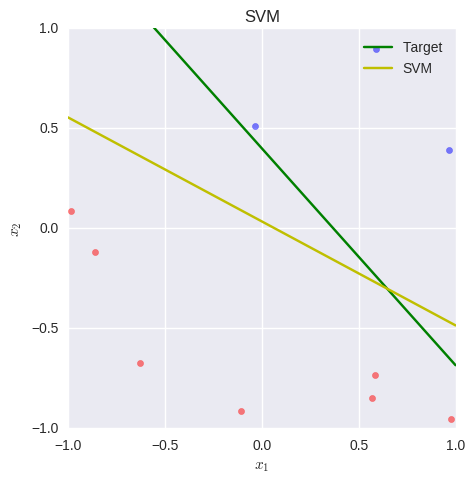


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************



0.617

In [6]:
simulate_svm_vs_pla(10, plot=true)

In [7]:
using PyCall,PyPlot
@pyimport seaborn as sns

function svm_win_plot(num_points, iterations=10)
    prob_list = []
    for idx in 1:iterations
        prob = simulate_svm_vs_pla(num_points)
        push!(prob_list, prob)
    end
    fig = figure(figsize=(5,5))
    plot(prob_list)
    grid("on")
    title("svm win prob")
    return prob_list
end

svm_win_plot (generic function with 2 methods)

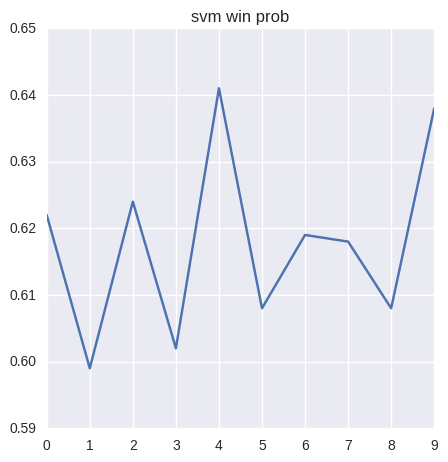

10-element Array{Any,1}:
 0.622
 0.599
 0.624
 0.602
 0.641
 0.608
 0.619
 0.618
 0.608
 0.638

In [8]:
svm_win_plot(10)

### 9.
For $N = 100$, repeat the above experiment for $1000$ runs. How often is $g_\mathrm{SVM}$
better than $g_\mathrm{PLA}$ in approximating $$? The percentage of time is closest to:

[a] 10%

[b] 30%

[c] 50%

[d] 70%

[e] 90%

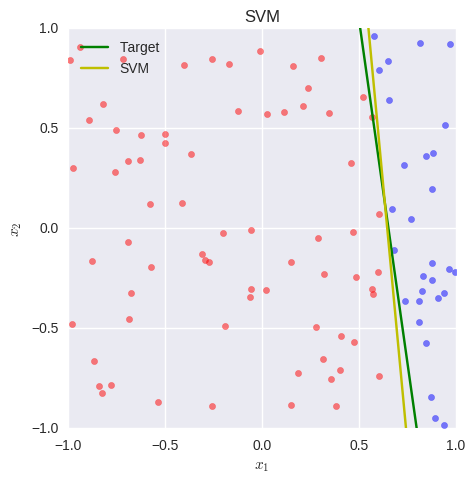

0.647

In [9]:
simulate_svm_vs_pla(100, plot=true)

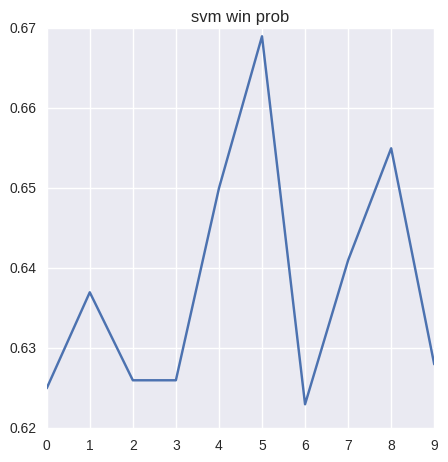

10-element Array{Any,1}:
 0.625
 0.637
 0.626
 0.626
 0.65 
 0.669
 0.623
 0.641
 0.655
 0.628

In [10]:
svm_win_plot(100)

### 10.
For the case $N = 100$, which of the following is the closest to the average number
of support vectors of $g_\mathrm{SVM}$ (averaged over the $1000$ runs)?

[a] 2

[b] 3

[c] 5

[d] 10

[e] 20

In [11]:
using PyCall,PyPlot
@pyimport seaborn as sns

function count_sv(num_points; num_iterations=1000)
    counts = []
    
    for idx in 1:num_iterations
        cnt = 0
        # Generate data
        targ_weights = nothing
        points = nothing
        labels = nothing
        while true
            targ_weights = gen_target()
            points, labels = gen_dataset(num_points, targ_weights)
            count(x-> x==1.0, labels) == num_points || break
        end
        
        # SVM
        weights = svm2(points, labels)
        
        for j in 1:num_points
            if isapprox((labels[j]*weights'*points[j,:][:])[], 1.0)
                cnt += 1
            end
        end
        push!(counts, cnt)
    end
    figure(figsize=(5,5))
    data = plt[:hist](counts, bins=[-0.5,0.5,1.5,2.5,3.5,4.5])
    title("histgram")
    for i in 1:length(data[1])
        println(i-1, ": ",round(Int,data[1][i]))
    end
    return mean(counts)
end

count_sv (generic function with 1 method)

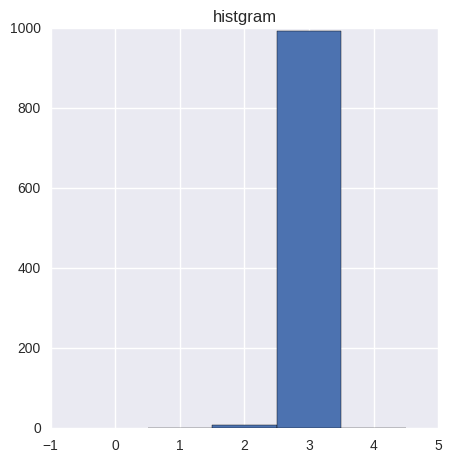

0: 0
1: 0
2: 7
3: 993
4: 0


2.993

In [12]:
count_sv(100, num_iterations=1000)

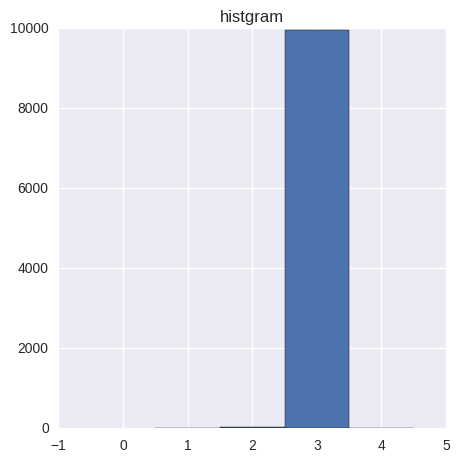

0: 0
1: 0
2: 34
3: 9966
4: 0


2.9966

In [13]:
count_sv(100, num_iterations=10000)

## Appendix: SVM with dual problem

In this implementation, support vectors are calculated from $\alpha_i > 10^{-5}$. If there is no such $\alpha_i$, this implementation fails. Admitting smaller $\alpha$ avoids this problem, but then the value of $b$ depends on which support vector is used for calculating $b$. 

In [14]:
using MathProgBase

# QP implementation of SVM, dual problem version
function svm3(x, y)
    #num_features = length(x[1,:][:])
    num_points = length(y)
    #q = y .* x[:,1:num_features]
    q = y .* x
    Q = q * q'
    c = -ones(num_points)
    A = y'
    sol = quadprog(c, Q, A, '=', 0.0, 0.0, Inf, IpoptSolver(print_level=0))
    a = sol.sol
    
    # we need small positive to guarantee a unieuq 'b'
    #sv = find(a .> 0)
    sv = find(a .> 1e-5)
    
    # backup in case all a is to small
    if length(sv) == 0
        sv = find(a .> 0)
    end
    
    w = sum(a[sv] .* y[sv] .* x[sv, :], 1)'
    b = y[sv[1]]- w' * x[sv[1],:]'
    return [b;w], length(sv)
end

svm3 (generic function with 1 method)

In [15]:
function simulate_svm_vs_pla2(num_points; num_iterations=1000, num_mcpoints=100000, plot=false)
    svm_win = 0
    for idx in 1:num_iterations
        # Generate data
        targ_weights = nothing
        points = nothing
        labels = nothing
        while true
            targ_weights = gen_target()
            points, labels = gen_dataset(num_points, targ_weights)
            count(x-> x==1.0, labels) == num_points || break
        end
        
        # PLA
        weights, _ = perceptron(points, labels)
        pla_prob = prob_difference(targ_weights, weights, num_mcpoints=num_mcpoints)
        
        # SVM
        #weights = svm(points, labels)
        weights, _ = svm3(points[:,2:3], labels)
        svm_prob = prob_difference(targ_weights, weights, num_mcpoints=num_mcpoints)
        
        if svm_prob < pla_prob
            svm_win += 1
        end
        
        if plot == true && idx == num_iterations
            plot_svm(points, labels, targ_weights, weights)
        end
    end
    return svm_win/num_iterations
end

simulate_svm_vs_pla2 (generic function with 1 method)

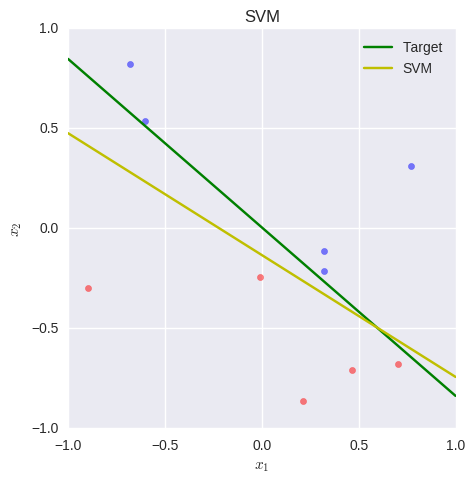

0.588

In [17]:
simulate_svm_vs_pla2(10, plot=true)

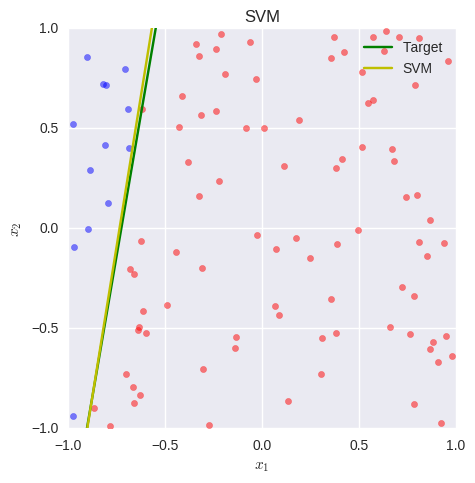

0.628

In [18]:
simulate_svm_vs_pla2(100, plot=true)

In [19]:
using PyCall,PyPlot
@pyimport seaborn as sns

function count_sv2(num_points; num_iterations=1000)
    counts = []
    
    for idx in 1:num_iterations
        cnt = 0
        # Generate data
        targ_weights = nothing
        points = nothing
        labels = nothing
        while true
            targ_weights = gen_target()
            points, labels = gen_dataset(num_points, targ_weights)
            count(x-> x==1.0, labels) == num_points || break
        end
        
        # SVM
        weights, _ = svm3(points[:,2:3], labels)
        for j in 1:num_points
            #if isapprox((labels[j]*weights'*points[j,:][:])[], 1.0)
            if (labels[j]*weights'*points[j,:][:])[] - 1.0 < 1e-5
                cnt += 1
            end
        end
        
        # Here is more accurate
        # _, cnt = svm3(points[:,2:3], labels)

        push!(counts, cnt)
    end
    figure(figsize=(5,5))
    data = plt[:hist](counts, bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5])
    title("histgram")
    for i in 1:length(data[1])
        println(i-1, ": ",round(Int,data[1][i]))
    end
    return mean(counts)
end

count_sv2 (generic function with 1 method)

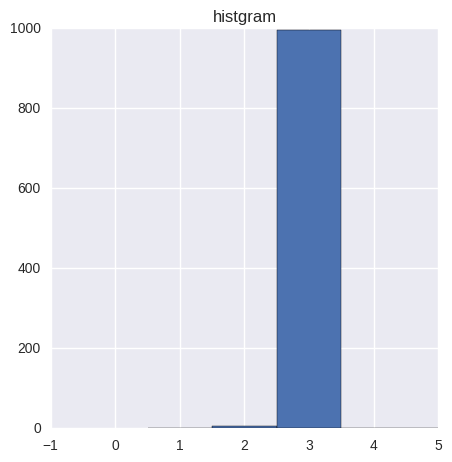

0: 0
1: 0
2: 5
3: 995
4: 0
5: 0


2.995

In [20]:
count_sv2(100)

In [22]:
using PyCall,PyPlot
@pyimport seaborn as sns

function svm_win_plot2(num_points, iterations=10)
    prob_list = []
    for idx in 1:iterations
        prob = simulate_svm_vs_pla2(num_points)
        push!(prob_list, prob)
    end
    fig = figure(figsize=(5,5))
    plot(prob_list, linestyle="None", marker=".")
    grid("on")
    title("svm win prob")
    return prob_list
end

svm_win_plot2 (generic function with 2 methods)

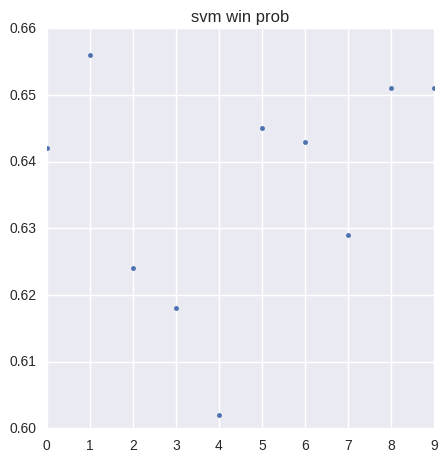

10-element Array{Any,1}:
 0.642
 0.656
 0.624
 0.618
 0.602
 0.645
 0.643
 0.629
 0.651
 0.651

In [23]:
svm_win_plot2(100)

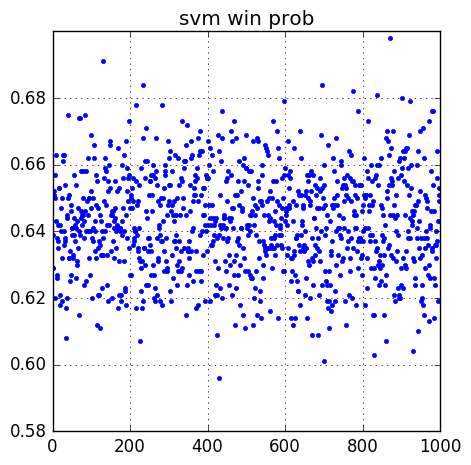

39115.058745 seconds (3.66 G allocations: 21.854 TB, 7.73% gc time)


1000-element Array{Any,1}:
 0.639
 0.629
 0.629
 0.652
 0.651
 0.62 
 0.65 
 0.657
 0.643
 0.663
 0.626
 0.638
 0.627
 ⋮    
 0.64 
 0.636
 0.632
 0.637
 0.656
 0.664
 0.619
 0.643
 0.651
 0.649
 0.653
 0.643

In [26]:
@time result_with_100points = svm_win_plot2(100, 1000)

In [27]:
@show(result_with_100points)

result_with_100points = Any[0.639,0.629,0.629,0.652,0.651,0.62,0.65,0.657,0.643,0.663,0.626,0.638,0.627,0.642,0.635,0.637,0.653,0.653,0.621,0.642,0.618,0.647,0.64,0.619,0.65,0.632,0.663,0.661,0.636,0.64,0.663,0.637,0.638,0.654,0.617,0.608,0.62,0.644,0.645,0.675,0.65,0.632,0.632,0.651,0.634,0.625,0.627,0.646,0.648,0.639,0.641,0.641,0.633,0.632,0.657,0.639,0.644,0.642,0.637,0.626,0.641,0.654,0.643,0.631,0.63,0.635,0.647,0.615,0.674,0.64,0.674,0.639,0.658,0.646,0.644,0.642,0.645,0.645,0.65,0.658,0.643,0.638,0.624,0.675,0.646,0.64,0.625,0.658,0.64,0.649,0.645,0.64,0.662,0.65,0.65,0.632,0.627,0.64,0.669,0.652,0.647,0.638,0.62,0.641,0.65,0.637,0.666,0.662,0.643,0.634,0.64,0.657,0.648,0.632,0.612,0.655,0.647,0.621,0.635,0.637,0.621,0.645,0.636,0.611,0.633,0.643,0.623,0.633,0.64,0.633,0.638,0.691,0.649,0.656,0.662,0.659,0.64,0.658,0.648,0.633,0.642,0.624,0.619,0.652,0.655,0.66,0.642,0.667,0.653,0.666,0.634,0.645,0.62,0.646,0.645,0.646,0.637,0.641,0.643,0.632,0.644,0.655,0.647,0.635,0.64,0.652,

1000-element Array{Any,1}:
 0.639
 0.629
 0.629
 0.652
 0.651
 0.62 
 0.65 
 0.657
 0.643
 0.663
 0.626
 0.638
 0.627
 ⋮    
 0.64 
 0.636
 0.632
 0.637
 0.656
 0.664
 0.619
 0.643
 0.651
 0.649
 0.653
 0.643

In [42]:
[sort(result_with_100points)[1:10] sort(result_with_100points, rev=true)[1:10]]

10x2 Array{Any,2}:
 0.596  0.698
 0.601  0.691
 0.603  0.684
 0.604  0.684
 0.607  0.682
 0.607  0.681
 0.608  0.68 
 0.609  0.679
 0.609  0.679
 0.609  0.678

In [39]:
function question9_histgram()
    figure(figsize=(5,5))
    data = plt[:hist](result_with_100points)
    title("Histgram of SVM Win")
    return data
end

question9_histgram (generic function with 1 method)

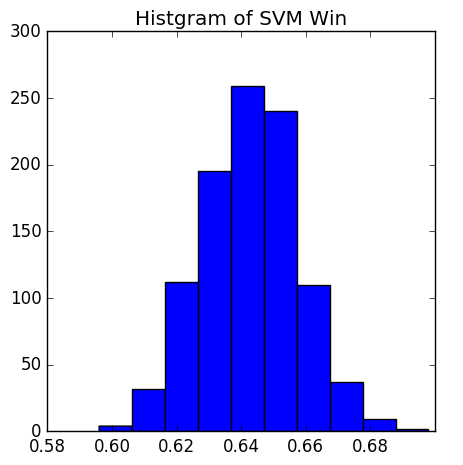

([4.0,32.0,112.0,195.0,259.0,240.0,110.0,37.0,9.0,2.0],[0.596,0.6062,0.6164,0.6265999999999999,0.6367999999999999,0.647,0.6572,0.6674,0.6776,0.6878,0.698],Any[PyObject <matplotlib.patches.Rectangle object at 0x7f115de64c50>,PyObject <matplotlib.patches.Rectangle object at 0x7f115de6b518>,PyObject <matplotlib.patches.Rectangle object at 0x7f115de6bc18>,PyObject <matplotlib.patches.Rectangle object at 0x7f115de72518>,PyObject <matplotlib.patches.Rectangle object at 0x7f115de72dd8>,PyObject <matplotlib.patches.Rectangle object at 0x7f115de786d8>,PyObject <matplotlib.patches.Rectangle object at 0x7f115de78fd0>,PyObject <matplotlib.patches.Rectangle object at 0x7f115de7d898>,PyObject <matplotlib.patches.Rectangle object at 0x7f115de84358>,PyObject <matplotlib.patches.Rectangle object at 0x7f115de84a58>])

In [40]:
question9_histgram()